In [2]:
import pandas as pd
import numpy as np

# Explore the data


In [3]:
DATA_FOLDER = 'habits/'
answers_file = "questionnaire_answers.csv"
questions_file = 'questions_table.csv'

questionnaire_answers= pd.read_csv(DATA_FOLDER + answers_file, sep=',', error_bad_lines=False, encoding = "utf-8").dropna()
questionnaire_questions= pd.read_csv(DATA_FOLDER + questions_file, sep=',', error_bad_lines=False, encoding = "utf-8").dropna()

In [4]:
questionnaire_answers.head()

,questionnaire answer identifier,date,time,user identifier,question identifier,score of the answer,questionnaire identifier
0,151,2018-05-07,14:30:46,114,1,7,1
1,152,2018-05-07,14:30:50,114,2,7,1
2,153,2018-05-07,14:30:54,114,3,7,1
3,154,2018-05-07,14:30:57,114,4,7,1
4,155,2018-05-07,14:31:05,114,5,7,1


In [5]:
questionnaire_users_df = questionnaire_answers.groupby(['questionnaire identifier', 'user identifier']).size().reset_index()

questionnaire_users_df.head()

,questionnaire identifier,user identifier,0
0,1,114,12
1,1,316,1
2,1,321,12
3,1,325,12
4,1,327,12


In [6]:
questionnaire_questions.head()

,question identifier,text,questionnaire identifier
0,1,"En classe, je manque souvent des points import...",1
1,2,"Lorsque je lis un document pour ce cours, je p...",1
2,3,Lorsque je lis un document pour ce cours et qu...,1
3,4,Si les documents du cours sont difficiles à co...,1
4,5,Avant d’étudier un nouveau document du cours e...,1


In [7]:
questionnaire_questions_df = questionnaire_questions.groupby(['questionnaire identifier']).size().reset_index()

questionnaire_questions_df.head()

,questionnaire identifier,0
0,1,12
1,2,7
2,4,8
3,5,4
4,7,3


In [8]:
questionnaires_num = 25
questions_num = []
for i in range(questionnaires_num + 1):
    try:
        questions_num.append(int(questionnaire_questions_df.loc[questionnaire_questions_df['questionnaire identifier'] == i][0]))
    except:
        questions_num.append(0)

In [9]:
bad_indices =[]
for index, row in questionnaire_users_df.iterrows():
    if row[0] != questions_num[row['questionnaire identifier']]:
        bad_indices.append(index)
        
print(len(bad_indices))

66


In [10]:
questionnaire_users_cp = questionnaire_users_df.copy()
removed = 0
for x in bad_indices:
    try:
        questionnaire_users_cp = questionnaire_users_cp.drop(questionnaire_users_cp.index[x - removed])
        removed += 1
    except:
        print(str(x) + " not found")

In [11]:
questionnaire_users_cp.groupby(['questionnaire identifier']).size().sort_values(ascending=False)

questionnaire identifier
11    460
12    453
13    452
1     347
2     248
4     187
5     186
18    113
20    112
19    112
9     105
7     103
8      99
22     72
24     69
23     69
16     50
15     50
25      5
dtype: int64

In [12]:
questionnaire_answers.head()

,questionnaire answer identifier,date,time,user identifier,question identifier,score of the answer,questionnaire identifier
0,151,2018-05-07,14:30:46,114,1,7,1
1,152,2018-05-07,14:30:50,114,2,7,1
2,153,2018-05-07,14:30:54,114,3,7,1
3,154,2018-05-07,14:30:57,114,4,7,1
4,155,2018-05-07,14:31:05,114,5,7,1


In [13]:
def CronbachAlpha(itemscores):
    itemvars = itemscores.var(axis=1, ddof=1)
    tscores = itemscores.sum(axis=0)
    nitems = len(itemscores)

    return nitems / (nitems-1.) * (1 - itemvars.sum() / tscores.var(ddof=1))

In [14]:
def create_student_questions_matrix(df):
    students = pd.Series(df['user identifier'], name='A').unique().tolist()
    questions = pd.Series(df['question identifier'], name='A').unique().tolist()
    students_questions = np.zeros(shape=(len(questions), len(students)))
    
    for index, row in df.iterrows():
        s = students.index(row['user identifier'])
        q = questions.index(row['question identifier'])
        
        students_questions[q][s] = row['score of the answer']
    
    return students_questions

In [15]:
students_questions = create_student_questions_matrix(questionnaire_answers)
students_questions

array([[7., 3., 3., ..., 3., 6., 3.],
       [7., 5., 1., ..., 2., 4., 2.],
       [7., 6., 5., ..., 6., 7., 7.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [16]:
CronbachAlpha(students_questions)

0.9766371248207409

# Per questionnaire


In [17]:
questionnaires = pd.Series(questionnaire_answers['questionnaire identifier'], name='A').unique().tolist()
questionnaires

[1, 2, 4, 5, 7, 8, 11, 12, 13, 22, 23, 24, 18, 19, 20, 15, 16, 9, 25]

In [18]:
questionnaires_CronbachAlpha = []

for q in questionnaires:
    c = CronbachAlpha(create_student_questions_matrix(questionnaire_answers[questionnaire_answers['questionnaire identifier'] == q]))
    questionnaires_CronbachAlpha.append(c)

In [18]:
for i in range(len(questionnaires)):
    print("reliability of questionnaire {} is {}".format(questionnaires[i],questionnaires_CronbachAlpha[i]))

reliability of questionnaire 1 is 0.8689709750836196
reliability of questionnaire 2 is 0.580399580124851
reliability of questionnaire 4 is 0.7649848361130397
reliability of questionnaire 5 is 0.7483906904142549
reliability of questionnaire 7 is 0.37251548664158374
reliability of questionnaire 8 is 0.614920377320215
reliability of questionnaire 11 is 0.5297423133854757
reliability of questionnaire 12 is 0.6608979593374414
reliability of questionnaire 13 is -0.36924436369456226
reliability of questionnaire 22 is 0.7355681629299287
reliability of questionnaire 23 is 0.848671024265258
reliability of questionnaire 24 is 0.6064659062935914
reliability of questionnaire 18 is 0.7108593638168498
reliability of questionnaire 19 is 0.7000261220021893
reliability of questionnaire 20 is 0.6690401373719836
reliability of questionnaire 15 is 0.9086912746919268
reliability of questionnaire 16 is 0.8689867473651257
reliability of questionnaire 9 is 0.4805951157441393
reliability of questionnaire 25 is 

# Self regulation

In [33]:
self_regulation_questions = range(104,116)

for q in self_regulation_questions:
    print("q "+ str(q) +"=> mean:" + str(questionnaire_answers[questionnaire_answers['question identifier'] == q]['score of the answer'].mean()) + ", std:" + str(questionnaire_answers[questionnaire_answers['question identifier'] == q]['score of the answer'].std()))

q 104=> mean:4.8, std:1.6431676725154984
q 105=> mean:4.2, std:1.3038404810405297
q 106=> mean:6.4, std:1.3416407864998738
q 107=> mean:3.8, std:2.16794833886788
q 108=> mean:5.8, std:1.6431676725154984
q 109=> mean:5.6, std:1.51657508881031
q 110=> mean:5.6, std:1.1401754250991378
q 111=> mean:4.2, std:2.16794833886788
q 112=> mean:5.6, std:0.5477225575051662
q 113=> mean:6.2, std:0.8366600265340756
q 114=> mean:5.2, std:1.7888543819998317
q 115=> mean:5.6, std:1.9493588689617927


# PCA


#### Questionnaire 14

In [23]:
import numpy as np
from sklearn.decomposition import PCA

In [39]:
pca_2 = PCA(n_components=2)

In [54]:
df15 = questionnaire_answers[questionnaire_answers['questionnaire identifier'] == 15]

In [41]:
df16 = questionnaire_answers[questionnaire_answers['questionnaire identifier'] == 16]

In [42]:
df_row_reindex = pd.concat([df15, df16], ignore_index=True)

In [43]:
q14_data = create_student_questions_matrix(df_row_reindex)
pca_2.fit(q14_data) 

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [44]:
print(pca_2.explained_variance_ratio_)

[0.30363272 0.16690825]


In [45]:
print(pca_2.singular_values_)  

[19.83939084 14.70933222]


In [55]:
pca_2

PCA(copy=True, iterated_power='auto', n_components=2, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [51]:
q14_data

array([[6., 7., 7., 6., 7., 5., 7., 1., 6., 6., 7., 1., 7., 6., 4., 5.,
        5., 7., 5., 7., 7., 5., 7., 2., 7., 7., 7., 5., 6., 6., 1., 6.,
        7., 5., 5., 7., 5., 5., 3., 7., 5., 7., 6., 7., 1., 7., 5., 7.,
        7., 7., 4., 7.],
       [3., 7., 6., 5., 5., 7., 4., 2., 6., 5., 5., 1., 7., 5., 5., 4.,
        6., 1., 4., 7., 4., 7., 4., 2., 6., 6., 7., 6., 5., 5., 2., 4.,
        6., 6., 5., 6., 5., 5., 2., 6., 5., 3., 0., 5., 1., 4., 3., 7.,
        7., 3., 5., 4.],
       [7., 7., 7., 6., 6., 5., 7., 6., 6., 7., 7., 2., 7., 6., 5., 6.,
        7., 7., 6., 7., 7., 7., 7., 5., 7., 7., 7., 6., 7., 6., 4., 7.,
        7., 7., 7., 7., 5., 6., 5., 6., 6., 7., 0., 4., 4., 6., 5., 7.,
        7., 7., 6., 5.],
       [5., 7., 5., 5., 5., 5., 6., 2., 6., 5., 7., 1., 7., 2., 1., 1.,
        7., 7., 6., 7., 6., 6., 4., 3., 7., 6., 7., 5., 2., 6., 3., 6.,
        7., 4., 5., 7., 2., 3., 4., 5., 2., 7., 0., 4., 1., 6., 6., 7.,
        5., 5., 4., 1.],
       [6., 7., 5., 7., 6., 4., 6., 

In [59]:
q14_transformed = PCA(n_components=2).fit_transform(q14_data)
q14_transformed

array([[-4.73707846, -2.06655004],
       [-0.44502587,  1.5593591 ],
       [-5.51397601, -5.36535428],
       [-2.90207658,  4.87751618],
       [-6.79256204,  0.74401163],
       [-4.51872935,  7.53873306],
       [-3.22815161, -2.46247463],
       [-4.51127569, -0.73815656],
       [ 7.53918097, -2.54050638],
       [ 6.45054807, -4.24085706],
       [ 3.39810904, -5.54074039],
       [ 5.58582988,  2.69559012],
       [ 9.67520764,  5.53942925]])

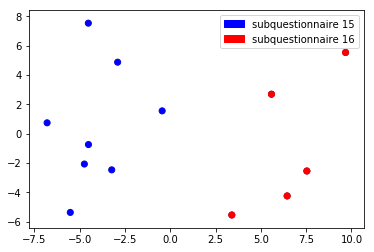

In [87]:
import matplotlib.pyplot as plt
color = [1,1,1,1,1,1,1,1,0,0,0,0,0]

plt.scatter(q14_transformed[:,0],q14_transformed[:,1] ,c=color)
color_q10 = ["blue","blue","blue","blue","blue","blue","blue","blue","red","red","red","red","red"]

red_patch = mpatches.Patch(color='red', label='subquestionnaire 16')
blue_patch = mpatches.Patch(color='blue', label='subquestionnaire 15')


plt.scatter(q14_transformed[:,0],q14_transformed[:,1] ,c=color_q10)
plt.legend(handles=[blue_patch,red_patch])
plt.show()

plt.show()

#### Questionnaire 10

In [46]:
pca_3 = PCA(n_components=3)

In [47]:
df11 = questionnaire_answers[questionnaire_answers['questionnaire identifier'] == 11]
df12 = questionnaire_answers[questionnaire_answers['questionnaire identifier'] == 12]
df13 = questionnaire_answers[questionnaire_answers['questionnaire identifier'] == 13]

In [48]:
df_11_12 = pd.concat([df11, df12], ignore_index=True)
df_11_12_13 = pd.concat([df_11_12, df13], ignore_index=True)

q10_data = create_student_questions_matrix(df_11_12_13)
pca_3.fit(q10_data) 

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [49]:
print(pca_3.explained_variance_ratio_)

[0.28732198 0.13218058 0.11016434]


In [50]:
print(pca_3.singular_values_)  

[66.21544817 44.91162034 41.00109182]


In [79]:
q10_transformed = PCA(n_components=2).fit_transform(q10_data)
q10_transformed

array([[-13.77362156,  -3.58021614],
       [-23.36081431,  -7.08280217],
       [-22.34516269,  -6.0135721 ],
       [ -6.23864064,  -9.25668928],
       [ 21.93185814,  23.16199337],
       [ 20.75347701,  13.05378889],
       [  6.54458539,  11.30267253],
       [  0.93144176,   9.38711823],
       [-21.0717171 ,   4.92063746],
       [-15.13863154,   5.44757223],
       [ 17.44893111, -19.94045201],
       [ 34.31829443, -21.400051  ]])

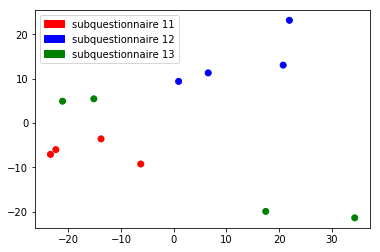

In [81]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
color_q10 = ['red','red','red','red','blue','blue','blue','blue','green','green','green','green']
color_label = ['','sub_questionnaire 12','sub_questionnaire 11','purple']

plt.scatter(q10_transformed[:,0],q10_transformed[:,1] ,c=color_q10)
red_patch = mpatches.Patch(color='red', label='subquestionnaire 11')
blue_patch = mpatches.Patch(color='blue', label='subquestionnaire 12')
green_patch = mpatches.Patch(color='green', label='subquestionnaire 13')

plt.legend(handles=[red_patch,blue_patch,green_patch])
plt.show()